In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw=pd.read_csv('./Survey.csv')
raw.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
filtering = pd.DataFrame(raw, columns = ['Country','state','family_history','treatment', 'work_interfere','Gender'])
filtering.head()

,Country,state,family_history,treatment,work_interfere,Gender
0,United States,IL,No,Yes,Often,Female
1,United States,IN,No,No,Rarely,M
2,Canada,NaN,No,No,Rarely,Male
3,United Kingdom,NaN,Yes,Yes,Often,Male
4,United States,TX,No,No,Never,Male


In [8]:
 conditions = [(raw['family_history'] == 'Yes') ,
    (raw['treatment'] == 'Yes') ,
    (raw['work_interfere'] == 'Often'),
    (raw['work_interfere'] == 'Sometimes')]
choices = ['yes','yes','yes','yes']
filtering['problem'] = np.select(conditions, choices, default = 'no')

In [10]:
mental = pd.DataFrame(filtering, columns = ['Country','state','problem'])
mental_y = mental[mental['problem'].str.contains('yes')]
mental_y.head()

,Country,state,problem
0,United States,IL,yes
3,United Kingdom,NaN,yes
5,United States,TN,yes
6,United States,MI,yes
8,United States,IL,yes


In [12]:
mentalgroup = mental_y.groupby(['Country'])['Country'].count().reset_index(name='total')
mentalgroup.head()

,Country,total
0,Australia,18
1,Austria,2
2,"Bahamas, The",1
3,Belgium,3
4,Bosnia and Herzegovina,1


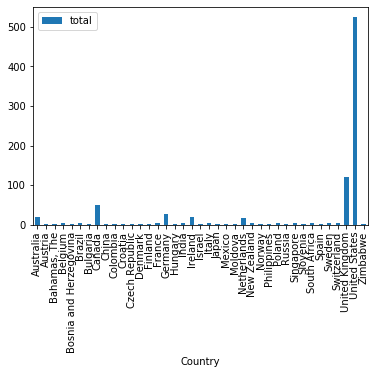

In [13]:
mentalgroup.plot.bar(x="Country")

In [14]:
mentalus = mental_y[mental_y['Country'].str.contains('United States')]
mentalus.head()

,Country,state,problem
0,United States,IL,yes
5,United States,TN,yes
6,United States,MI,yes
8,United States,IL,yes
10,United States,OH,yes


In [15]:
mentalusstates = pd.DataFrame(mentalus, columns = ['state','problem'])
mentalusstates.head()

,state,problem
0,IL,yes
5,TN,yes
6,MI,yes
8,IL,yes
10,OH,yes


In [16]:
mentalusstategroup = mentalusstates.groupby(['state'])['state'].count().reset_index(name='total')
mentalusstategroup.head()

,state,total
0,AL,7
1,AZ,6
2,CA,110
3,CO,4
4,CT,3


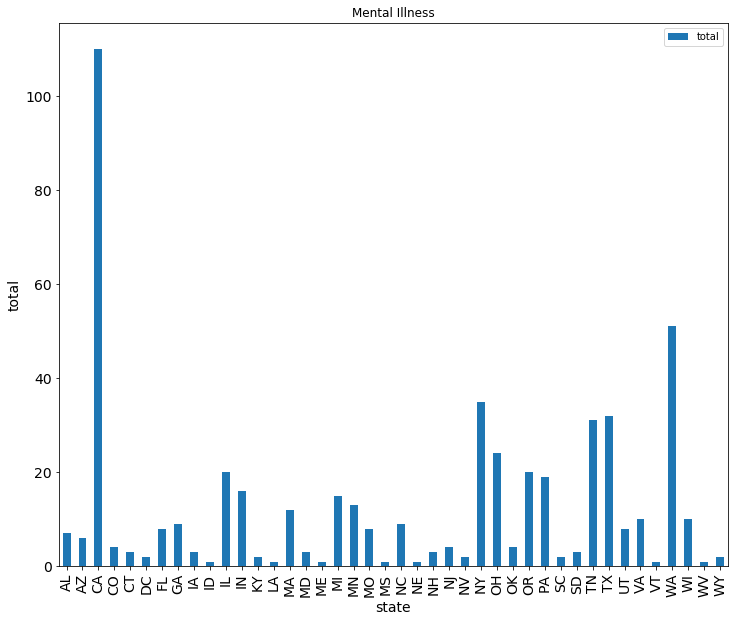

In [17]:
fig = mentalusstategroup[['state','total']].plot(x = 'state', y = 'total',kind='bar', title ="Mental Illness", figsize=(12, 10), legend=True, fontsize=14)
fig.set_xlabel("state", fontsize=14)
fig.set_ylabel("total", fontsize=14)
plt.show()

In [18]:
filtering2 = pd.DataFrame(raw, columns = ['Country','state','wellness_program','seek_help','leave','coworkers','mental_health_interview','mental_health_consequence'])
filtering.head()

,Country,state,family_history,treatment,work_interfere,Gender,problem
0,United States,IL,No,Yes,Often,Female,yes
1,United States,IN,No,No,Rarely,M,no
2,Canada,NaN,No,No,Rarely,Male,no
3,United Kingdom,NaN,Yes,Yes,Often,Male,yes
4,United States,TX,No,No,Never,Male,no


In [20]:
conditions = [
    (raw['wellness_program'] == 'Yes'),
    (raw['seek_help'] == 'Yes') ,
    (raw['leave'] == 'Very easy'),
    (raw['leave'] == 'Somewhat easy'),
    (raw['coworkers'] == 'Yes'),
    (raw['mental_health_interview'] == 'Yes'),
    (raw['mental_health_consequence'] == 'Yes')]
choices = ['ok','ok','ok','ok','ok','ok','ok']
filtering2['result'] = np.select(conditions, choices, default = 'not ok')
filtering2.head()

,Country,state,wellness_program,seek_help,leave,coworkers,mental_health_interview,mental_health_consequence,result
0,United States,IL,No,Yes,Somewhat easy,Some of them,No,No,ok
1,United States,IN,Don't know,Don't know,Don't know,No,No,Maybe,not ok
2,Canada,NaN,No,No,Somewhat difficult,Yes,Yes,No,ok
3,United Kingdom,NaN,No,No,Somewhat difficult,Some of them,Maybe,Yes,ok
4,United States,TX,Don't know,Don't know,Don't know,Some of them,Yes,No,ok


In [21]:
filtering2us = filtering2[filtering2['Country'].str.contains('United States')]
filtering2us.head()

,Country,state,wellness_program,seek_help,leave,coworkers,mental_health_interview,mental_health_consequence,result
0,United States,IL,No,Yes,Somewhat easy,Some of them,No,No,ok
1,United States,IN,Don't know,Don't know,Don't know,No,No,Maybe,not ok
4,United States,TX,Don't know,Don't know,Don't know,Some of them,Yes,No,ok
5,United States,TN,No,Don't know,Don't know,Yes,No,No,ok
6,United States,MI,No,No,Somewhat difficult,Some of them,No,Maybe,not ok


In [22]:
filtering2usstates = pd.DataFrame(filtering2us, columns = ['state','result'])
filtering2usstates.head()

,state,result
0,IL,ok
1,IN,not ok
4,TX,ok
5,TN,ok
6,MI,not ok


In [23]:
filtering2usstatesfinal= filtering2usstates[filtering2usstates['result'].str.contains('ok')]
filtering2usstatesfinalgroup = filtering2usstatesfinal.groupby(['state'])['state'].count().reset_index(name='total')
filtering2usstatesfinalgroup.head()

,state,total
0,AL,8
1,AZ,7
2,CA,138
3,CO,9
4,CT,4


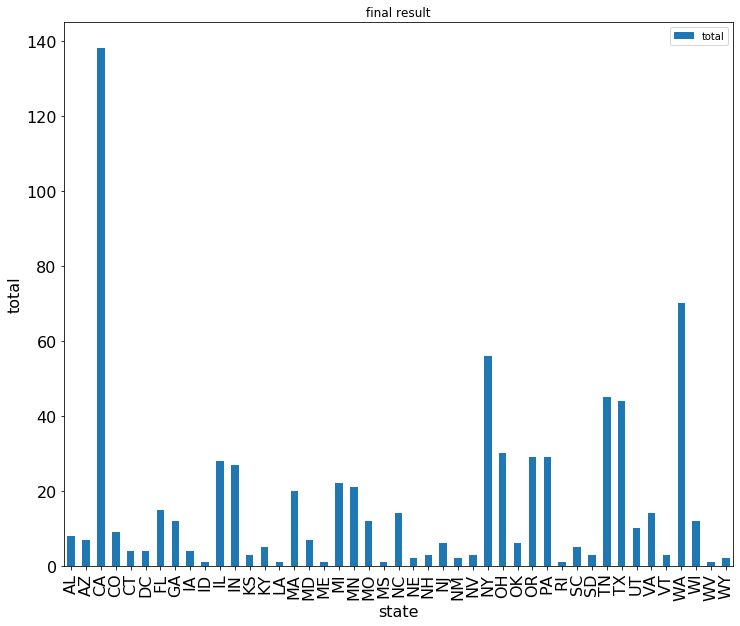

In [24]:
fig = filtering2usstatesfinalgroup[['state','total']].plot(x = 'state', y = 'total',kind='bar', title ="final result", figsize=(12, 10), legend=True, fontsize=16)
fig.set_xlabel("state", fontsize=16)
fig.set_ylabel("total", fontsize=16)
plt.show()